# Graphics of Neon Line Ratios Histograms and Ne Line Ratios vs fracAGN

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
print('Total number of galaxies with Ne ratios data: ',len(Ne_Sy))

Total number of galaxies with Ne ratios data:  95


In the next cell we calculate the logaritmic values for the Ne ratios, the star formation rate and the mass star with their error propagation

In [4]:
log_NeVNeII_Sy = np.log10(Ne_Sy['[NeV]/[NeII]'])
log_NeVNeIII_Sy = np.log10(Ne_Sy['[NeV]/[NeIII]'])
log_NeIIINeII_Sy = np.log10(Ne_Sy['[NeIII]/[NeII]'])
log_sfr_Sy = np.log10(Ne_Sy['bayes.sfh.sfr'])
log_m_star_Sy = np.log10(Ne_Sy['bayes.stellar.m_star'])

log_NeVNeII_Sy_err = Ne_Sy['[NeV]/[NeII]_err']/(Ne_Sy['[NeV]/[NeII]']*np.log(10))
log_NeVNeIII_Sy_err = Ne_Sy['[NeV]/[NeIII]_err']/(Ne_Sy['[NeV]/[NeIII]']*np.log(10))
log_NeIIINeII_Sy_err = Ne_Sy['[NeIII]/[NeII]_err']/(Ne_Sy['[NeIII]/[NeII]']*np.log(10))
log_sfr_Sy_err = Ne_Sy['bayes.sfh.sfr_err']/(Ne_Sy['bayes.sfh.sfr']*np.log(10))
log_m_star_Sy_err = Ne_Sy['bayes.stellar.m_star_err']/(Ne_Sy['bayes.stellar.m_star']*np.log(10))

#Adding the new values to the table
Ne_Sy['log_[NeV]/[NeII]'] = log_NeVNeII_Sy
Ne_Sy['log_[NeV]/[NeII]_err'] = log_NeVNeII_Sy_err

Ne_Sy['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy
Ne_Sy['log_[NeV]/[NeIII]_err'] = log_NeVNeIII_Sy_err

Ne_Sy['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy
Ne_Sy['log_[NeIII]/[NeII]_err'] = log_NeIIINeII_Sy_err

Ne_Sy['log_bayes.sfh.sfr'] = log_sfr_Sy
Ne_Sy['log_bayes.sfh.sfr_err'] = log_sfr_Sy_err

Ne_Sy['log_bayes.stellar.m_star'] = log_m_star_Sy
Ne_Sy['log_bayes.stellar.m_star_err'] = log_m_star_Sy_err

In [5]:
#Ne_Sy['Main_id','otype','bayes.agn.i','[NeV]/[NeII]','bayes.agn.fracAGN','bayes.agn.disk_luminosity']

### Separating the sample in Sy1 and Sy2 groups

In [6]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

print('Total number of Galaxies Seyfert 1: ',len(Ne_Sy1))
print('Total number of Galaxies Seyfert 2: ',len(Ne_Sy2))
print('Total number of Seyfert Galaxies without classification: ',len(Ne_SyG))

Total number of Galaxies Seyfert 1:  48
Total number of Galaxies Seyfert 2:  47
Total number of Seyfert Galaxies without classification:  0


## Histograms of the Ne ratios

### [NeV]/[NeII]

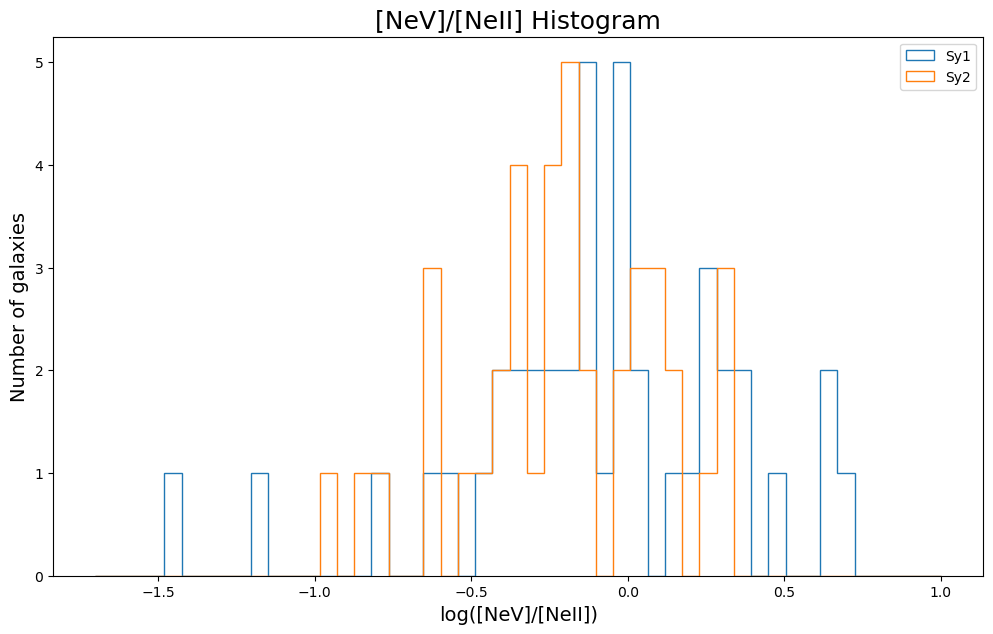

In [7]:
bins_NeV_NeII_Sy1 = np.linspace(-1.7,1,50)
bins_NeV_NeII_Sy2 = np.linspace(-1.7,1,50)
bins_NeV_NeII_SyG = np.linspace(-1.7,1,50)
plt.figure(figsize=(12,7))
plt.hist(Ne_Sy1['log_[NeV]/[NeII]'], bins=bins_NeV_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(Ne_Sy2['log_[NeV]/[NeII]'], bins=bins_NeV_NeII_Sy2, histtype='step', label='Sy2')
#plt.hist(Ne_SyG['log_[NeV]/[NeII]'], bins=bins_NeV_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

### [NeV]/[NeIII]

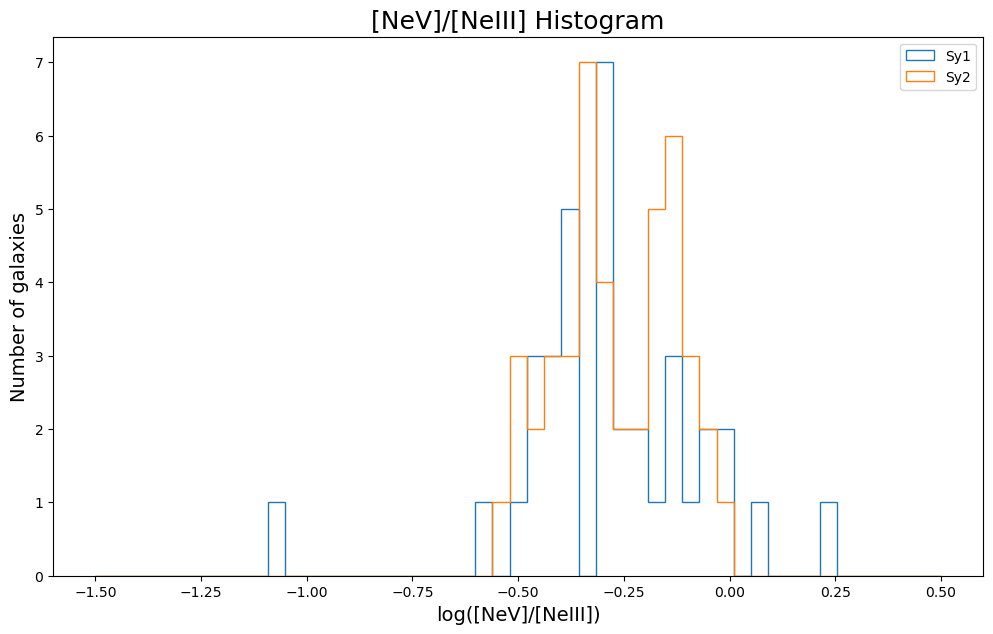

In [8]:
bins_NeV_NeIII_Sy1 = np.linspace(-1.5,0.5,50)
bins_NeV_NeIII_Sy2 = np.linspace(-1.5,0.5,50)
bins_NeV_NeIII_SyG = np.linspace(-1.5,0.5,50)
plt.figure(figsize=(12,7))
plt.hist(Ne_Sy1['log_[NeV]/[NeIII]'], bins=bins_NeV_NeIII_Sy1, histtype='step', label='Sy1')
plt.hist(Ne_Sy2['log_[NeV]/[NeIII]'], bins=bins_NeV_NeIII_Sy2, histtype='step', label='Sy2')
#plt.hist(Ne_SyG['log_[NeV]/[NeIII]'], bins=bins_NeV_NeIII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeIII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

### [NeIII]/[NeII]

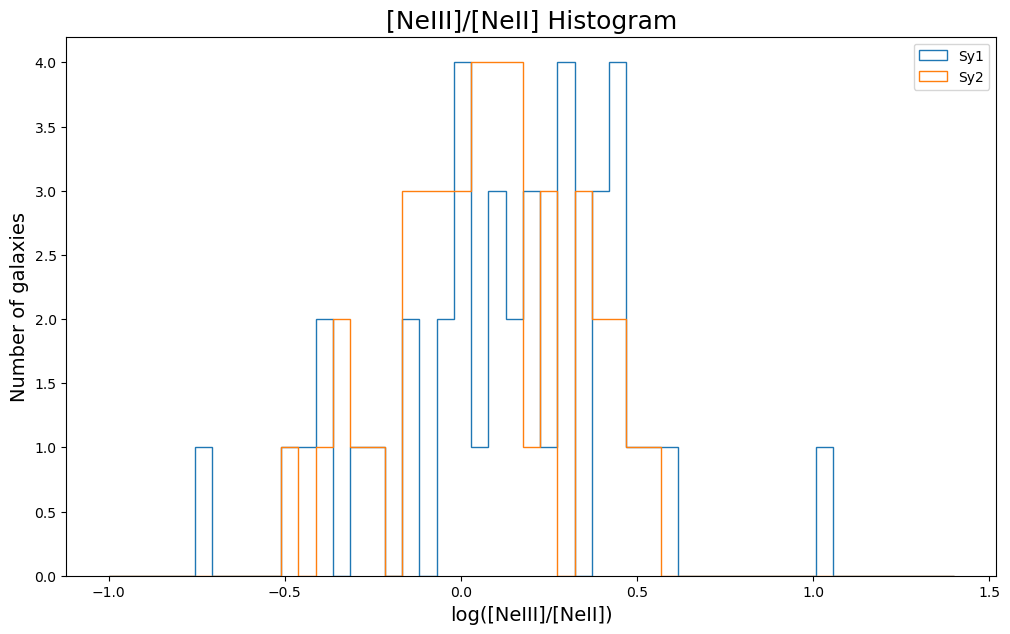

In [9]:
bins_NeIII_NeII_Sy1 = np.linspace(-1,1.4,50)
bins_NeIII_NeII_Sy2 = np.linspace(-1,1.4,50)
bins_NeIII_NeII_SyG = np.linspace(-1,1.4,50)
plt.figure(figsize=(12,7))
plt.hist(Ne_Sy1['log_[NeIII]/[NeII]'], bins=bins_NeIII_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(Ne_Sy2['log_[NeIII]/[NeII]'], bins=bins_NeIII_NeII_Sy2, histtype='step', label='Sy2')
#plt.hist(Ne_SyG['log_[NeIII]/[NeII]'], bins=bins_NeIII_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeIII]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## Graphics AGN Fraction vs Ne ratios

### [NeV]/[NeII]

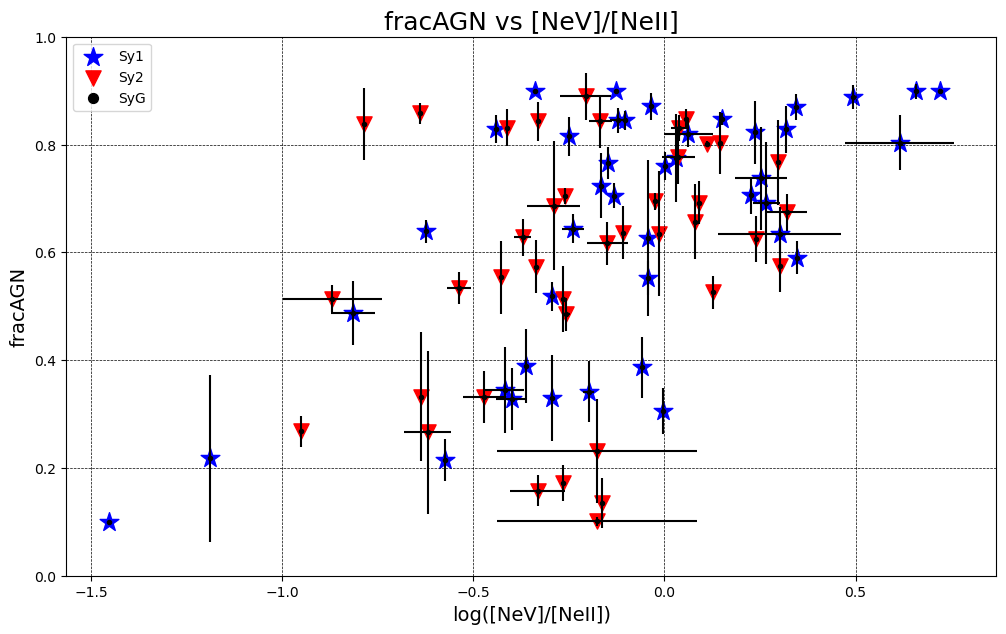

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['log_[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['log_[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['log_[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['log_[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['log_[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'log([NeV]/[NeII])', fontsize=14)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

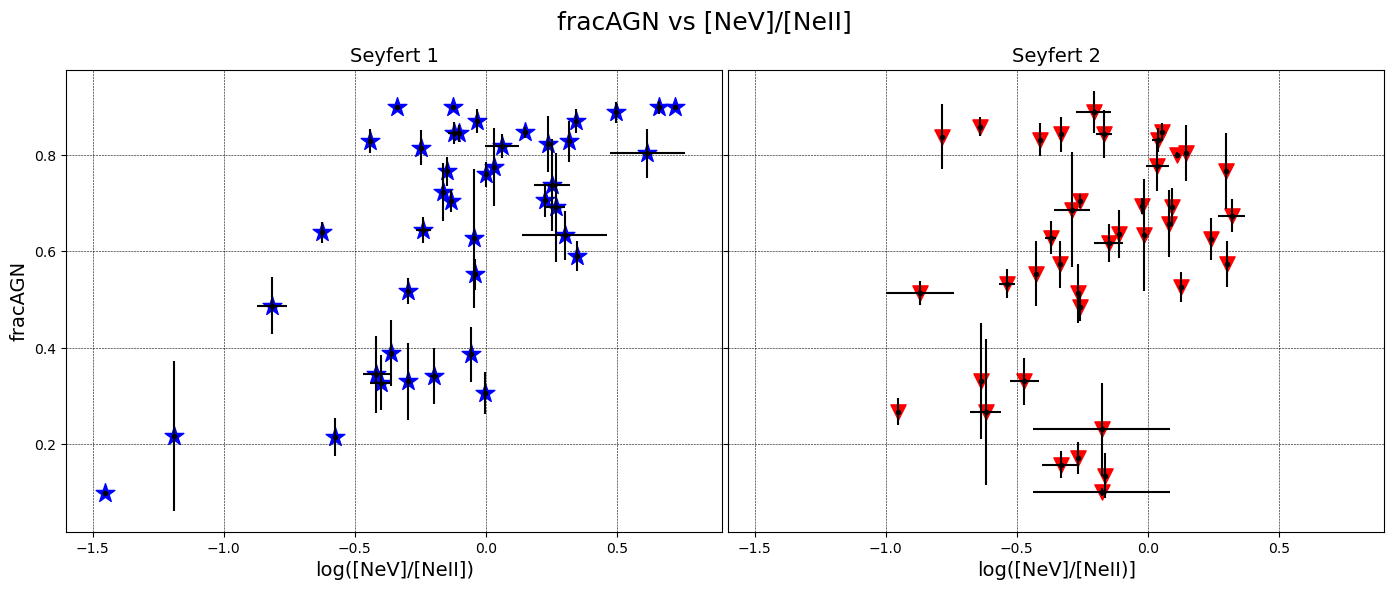

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['log_[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['log_[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.6,0.9)#ax1.set_xlim(20e-3,10e0) 
#ax1.set_xscale("log")
ax1.set_xlabel(r'log([NeV]/[NeII])', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.6,0.9)#ax2.set_xlim(20e-3,10e0)
#ax2.set_xscale("log")
ax2.set_xlabel(r'log([NeV]/[NeII)]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeV]/[NeIII]

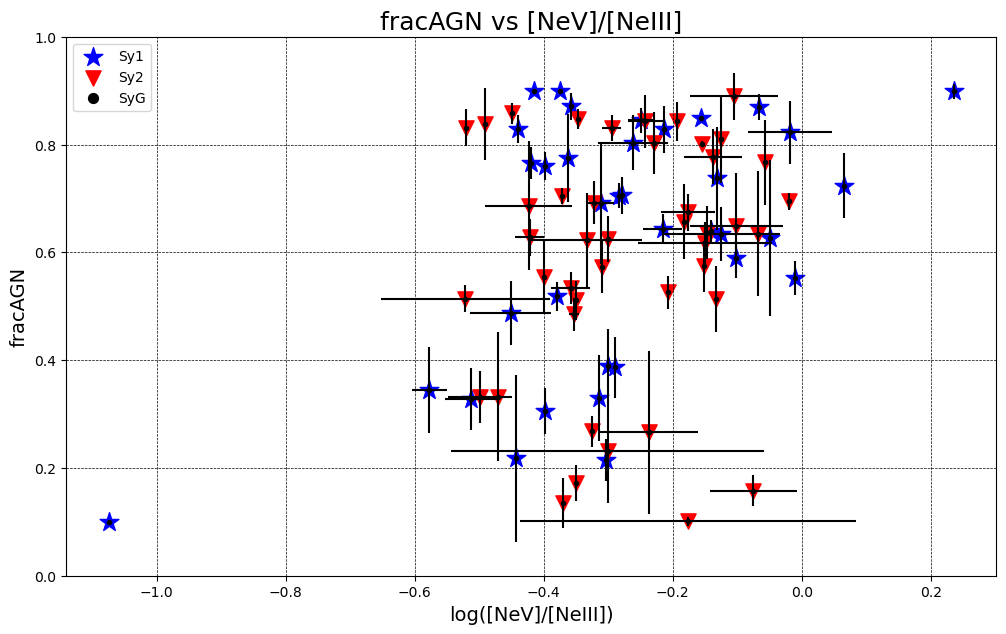

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['log_[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['log_[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['log_[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['log_[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_SyG['log_[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['log_[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'log([NeV]/[NeIII])', fontsize=14)
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

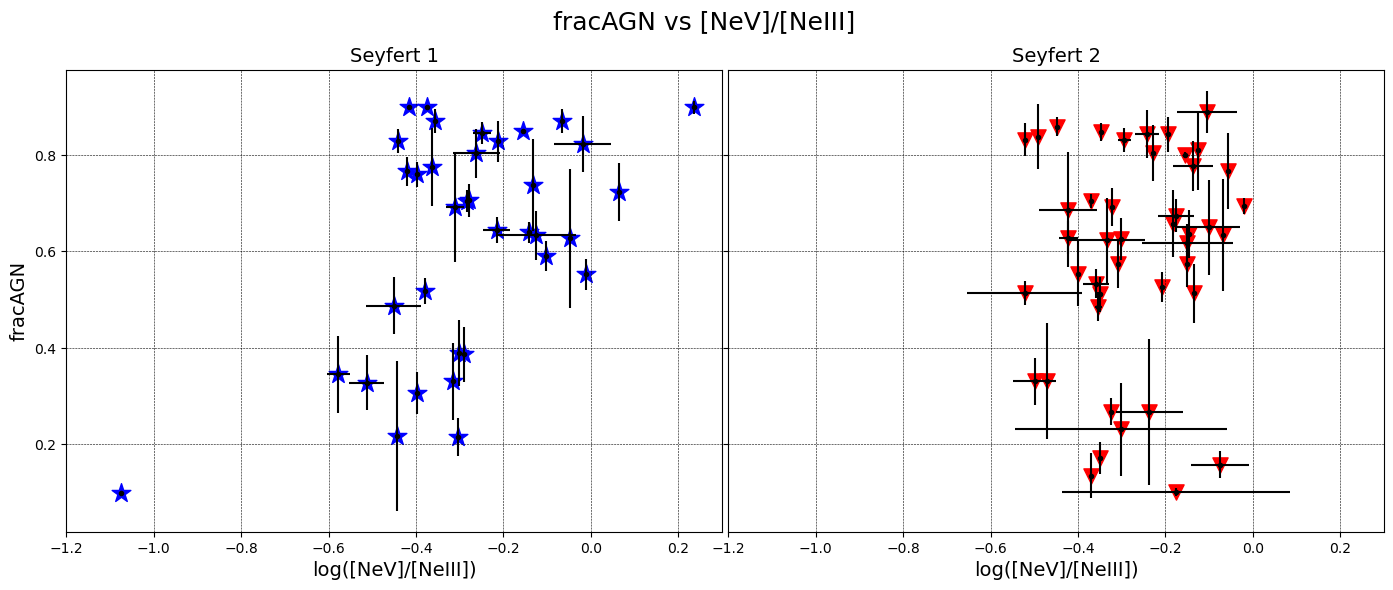

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
ax1.scatter(Ne_Sy1['log_[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['log_[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xlim(-1.2,0.3)
ax1.set_xlabel(r'log([NeV]/[NeIII])', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['log_[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['log_[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xlim(-1.2,0.3)
ax2.set_xlabel(r'log([NeV]/[NeIII])', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeIII]/[NeII]

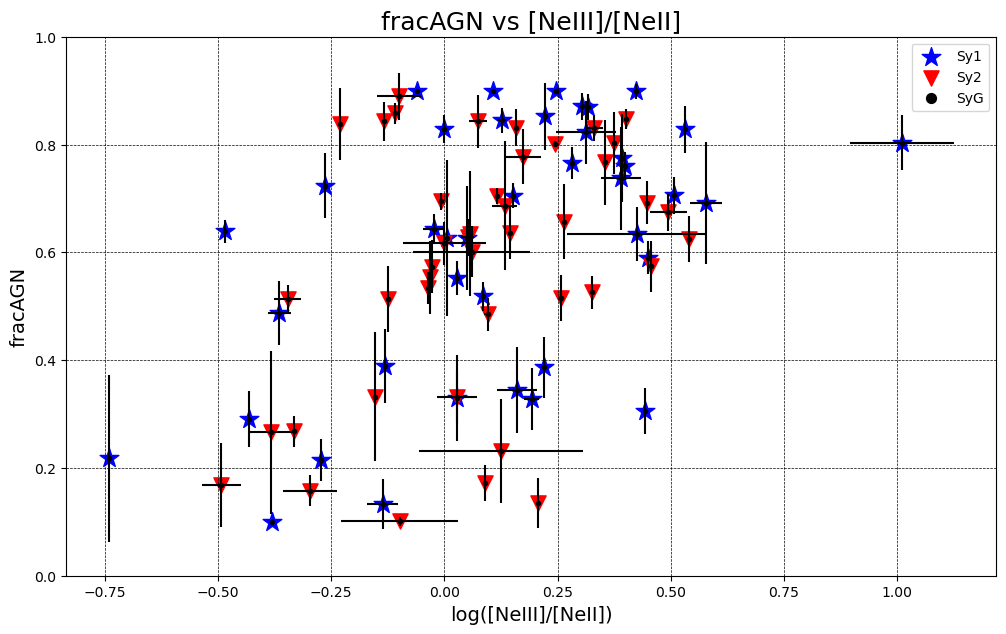

In [14]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['log_[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['log_[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['log_[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['log_[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['log_[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['log_[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'log([NeIII]/[NeII])', fontsize=14)
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

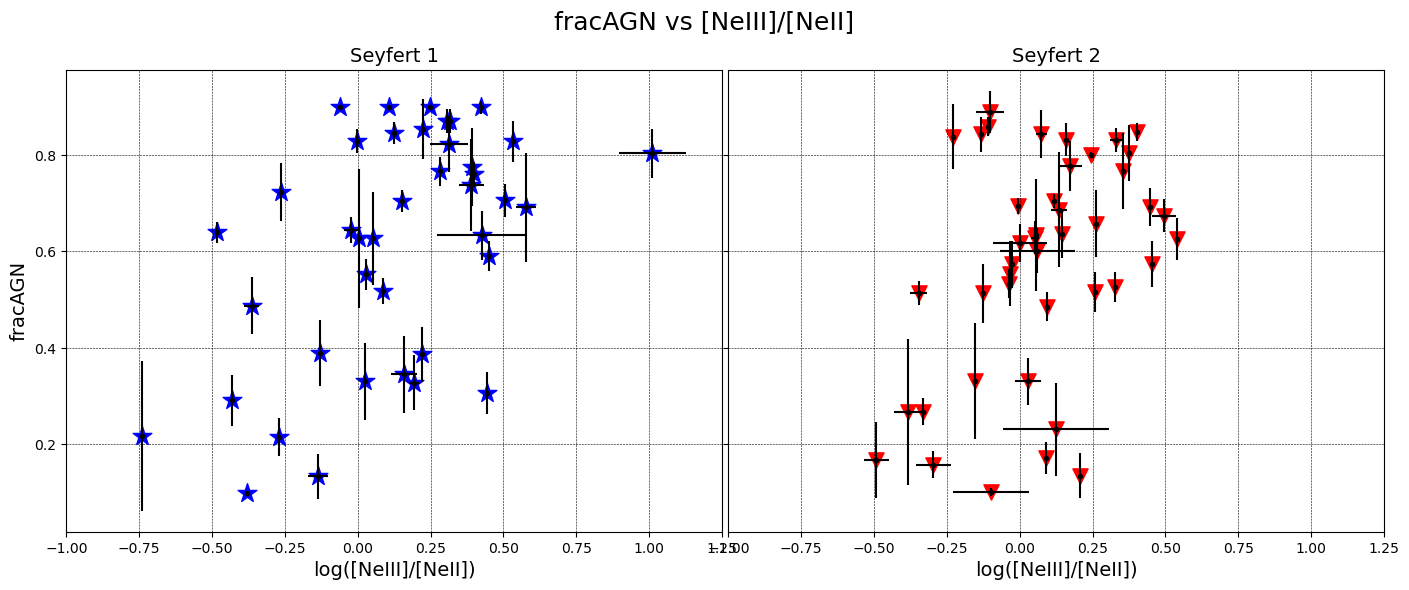

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['log_[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['log_[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['log_[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1,1.25)
ax1.set_xlabel(r'log([NeIII]/[NeII])', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['log_[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['log_[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['log_[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1,1.25)
ax2.set_xlabel(r'log([NeIII]/[NeII])', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlations

In [16]:
df_Ne_Sy = Ne_Sy.to_pandas()
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()

In [17]:
NeVNeII_corr_Sy = df_Ne_Sy.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy

RA                               0.030137
DEC                              0.001850
redshift                         0.316531
[NeV]/[NeII]                     0.832721
[NeV]/[NeII]_err                 0.663030
[NeV]/[NeIII]                    0.570332
[NeV]/[NeIII]_err                0.105001
[NeIII]/[NeII]                   0.692382
[NeIII]/[NeII]_err               0.613098
[NeII]/[NeV]                    -0.758994
[NeII]/[NeV]_err                -0.590663
bayes.agn.fracAGN                0.511753
bayes.agn.fracAGN_err           -0.148170
bayes.agn.i                      0.005572
bayes.agn.i_err                 -0.261156
bayes.agn.disk_luminosity        0.176676
bayes.agn.disk_luminosity_err    0.139628
bayes.sfh.sfr                    0.130330
bayes.sfh.sfr_err                0.151622
bayes.stellar.m_star             0.160284
bayes.stellar.m_star_err         0.202059
best.reduced_chi_square         -0.100817
log.reduced_chi_square          -0.075534
log_[NeV]/[NeII]                 1

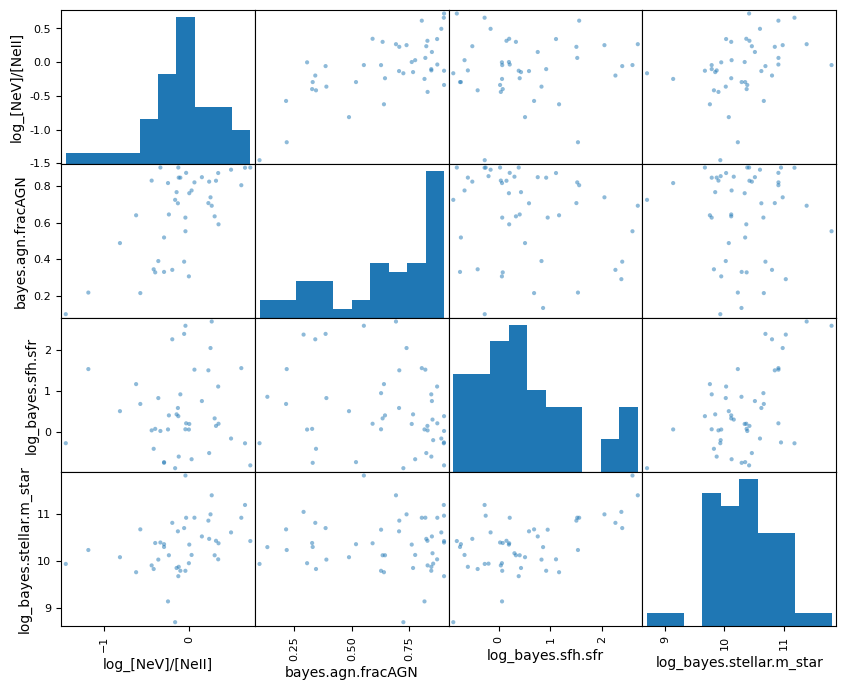

In [18]:
attributes=['log_[NeV]/[NeII]','bayes.agn.fracAGN','log_bayes.sfh.sfr','log_bayes.stellar.m_star']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_Ne_Sy1[attributes], figsize=(10,8))

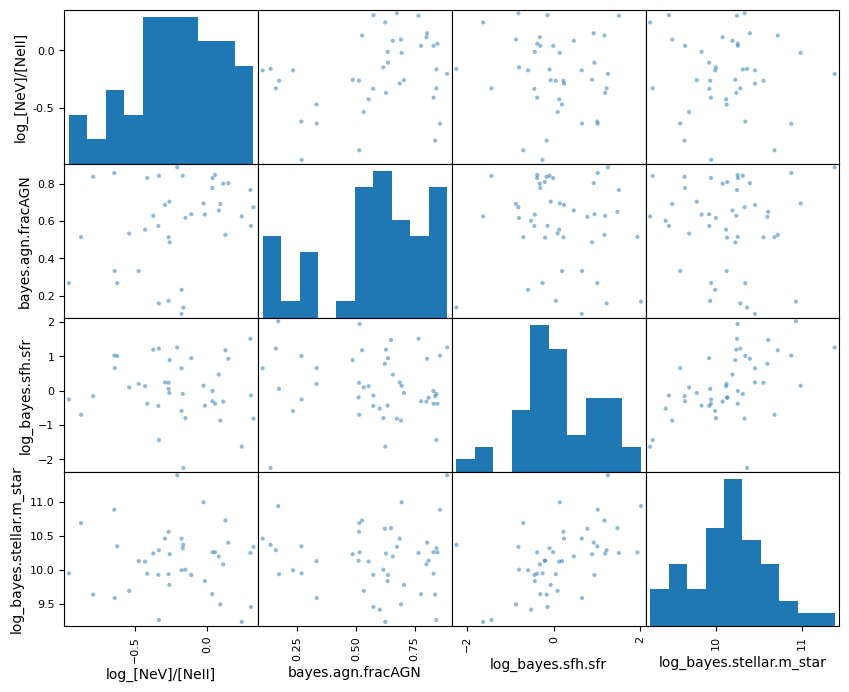

In [19]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_Ne_Sy2[attributes], figsize=(10,8))

In [20]:
NeVNeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy1

RA                              -0.061046
DEC                              0.119642
redshift                         0.366448
[NeV]/[NeII]                     0.822658
[NeV]/[NeII]_err                 0.753562
[NeV]/[NeIII]                    0.572692
[NeV]/[NeIII]_err                0.483159
[NeIII]/[NeII]                   0.659536
[NeIII]/[NeII]_err               0.676455
[NeII]/[NeV]                    -0.768361
[NeII]/[NeV]_err                -0.714874
bayes.agn.fracAGN                0.657601
bayes.agn.fracAGN_err           -0.157575
bayes.agn.i                      0.114636
bayes.agn.i_err                 -0.328189
bayes.agn.disk_luminosity        0.186187
bayes.agn.disk_luminosity_err    0.147661
bayes.sfh.sfr                    0.116140
bayes.sfh.sfr_err                0.154811
bayes.stellar.m_star             0.188687
bayes.stellar.m_star_err         0.276628
best.reduced_chi_square         -0.054222
log.reduced_chi_square          -0.032979
log_[NeV]/[NeII]                 1

In [21]:
NeVNeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy2

RA                               0.108577
DEC                             -0.331213
redshift                        -0.006021
[NeV]/[NeII]                     0.925722
[NeV]/[NeII]_err                 0.422873
[NeV]/[NeIII]                    0.566883
[NeV]/[NeIII]_err                0.082942
[NeIII]/[NeII]                   0.825071
[NeIII]/[NeII]_err               0.438803
[NeII]/[NeV]                    -0.913427
[NeII]/[NeV]_err                -0.620750
bayes.agn.fracAGN                0.292704
bayes.agn.fracAGN_err           -0.113607
bayes.agn.i                      0.157885
bayes.agn.i_err                 -0.313393
bayes.agn.disk_luminosity        0.004530
bayes.agn.disk_luminosity_err   -0.011023
bayes.sfh.sfr                    0.114623
bayes.sfh.sfr_err                0.024270
bayes.stellar.m_star            -0.023842
bayes.stellar.m_star_err         0.007345
best.reduced_chi_square         -0.099012
log.reduced_chi_square          -0.071398
log_[NeV]/[NeII]                 1

In [22]:
NeVNeIII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy1

RA                              -0.149129
DEC                              0.092590
redshift                         0.242248
[NeV]/[NeII]                     0.554912
[NeV]/[NeII]_err                 0.416223
[NeV]/[NeIII]                    0.903363
[NeV]/[NeIII]_err                0.761029
[NeIII]/[NeII]                   0.146434
[NeIII]/[NeII]_err               0.202786
[NeII]/[NeV]                    -0.669108
[NeII]/[NeV]_err                -0.513694
bayes.agn.fracAGN                0.509888
bayes.agn.fracAGN_err            0.070482
bayes.agn.i                      0.193378
bayes.agn.i_err                 -0.089194
bayes.agn.disk_luminosity        0.015060
bayes.agn.disk_luminosity_err   -0.008161
bayes.sfh.sfr                    0.123635
bayes.sfh.sfr_err                0.040587
bayes.stellar.m_star             0.282470
bayes.stellar.m_star_err         0.193804
best.reduced_chi_square         -0.112412
log.reduced_chi_square          -0.109435
log_[NeV]/[NeII]                 0

In [23]:
NeVNeIII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy2

RA                               0.098843
DEC                              0.032648
redshift                         0.236742
[NeV]/[NeII]                     0.535692
[NeV]/[NeII]_err                 0.314579
[NeV]/[NeIII]                    0.988666
[NeV]/[NeIII]_err                0.383410
[NeIII]/[NeII]                   0.167692
[NeIII]/[NeII]_err               0.216815
[NeII]/[NeV]                    -0.517735
[NeII]/[NeV]_err                -0.384208
bayes.agn.fracAGN                0.112129
bayes.agn.fracAGN_err            0.049452
bayes.agn.i                     -0.139332
bayes.agn.i_err                 -0.038996
bayes.agn.disk_luminosity        0.211043
bayes.agn.disk_luminosity_err    0.215822
bayes.sfh.sfr                    0.331942
bayes.sfh.sfr_err                0.253265
bayes.stellar.m_star             0.223298
bayes.stellar.m_star_err         0.205805
best.reduced_chi_square         -0.174706
log.reduced_chi_square          -0.132692
log_[NeV]/[NeII]                 0

In [24]:
NeIIINeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy1

RA                              -0.046294
DEC                              0.035557
redshift                         0.379695
[NeV]/[NeII]                     0.732814
[NeV]/[NeII]_err                 0.801169
[NeV]/[NeIII]                    0.152295
[NeV]/[NeIII]_err                0.223004
[NeIII]/[NeII]                   0.820957
[NeIII]/[NeII]_err               0.796235
[NeII]/[NeV]                    -0.601506
[NeII]/[NeV]_err                -0.685339
bayes.agn.fracAGN                0.522124
bayes.agn.fracAGN_err           -0.118431
bayes.agn.i                      0.181888
bayes.agn.i_err                 -0.322192
bayes.agn.disk_luminosity        0.253031
bayes.agn.disk_luminosity_err    0.227335
bayes.sfh.sfr                    0.073228
bayes.sfh.sfr_err                0.209246
bayes.stellar.m_star             0.096901
bayes.stellar.m_star_err         0.225487
best.reduced_chi_square          0.068480
log.reduced_chi_square           0.085792
log_[NeV]/[NeII]                 0

In [25]:
NeIIINeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy2

RA                              -0.029250
DEC                             -0.342562
redshift                        -0.279661
[NeV]/[NeII]                     0.850412
[NeV]/[NeII]_err                 0.231821
[NeV]/[NeIII]                    0.120922
[NeV]/[NeIII]_err               -0.239957
[NeIII]/[NeII]                   0.949865
[NeIII]/[NeII]_err               0.408322
[NeII]/[NeV]                    -0.771138
[NeII]/[NeV]_err                -0.558853
bayes.agn.fracAGN                0.404355
bayes.agn.fracAGN_err           -0.199667
bayes.agn.i                      0.342078
bayes.agn.i_err                 -0.507349
bayes.agn.disk_luminosity       -0.130016
bayes.agn.disk_luminosity_err   -0.200941
bayes.sfh.sfr                   -0.204574
bayes.sfh.sfr_err               -0.274757
bayes.stellar.m_star            -0.253374
bayes.stellar.m_star_err        -0.195029
best.reduced_chi_square         -0.057805
log.reduced_chi_square          -0.057351
log_[NeV]/[NeII]                 0

## Notebook Info

In [26]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2
astropy   : 5.1

Watermark: 2.3.1



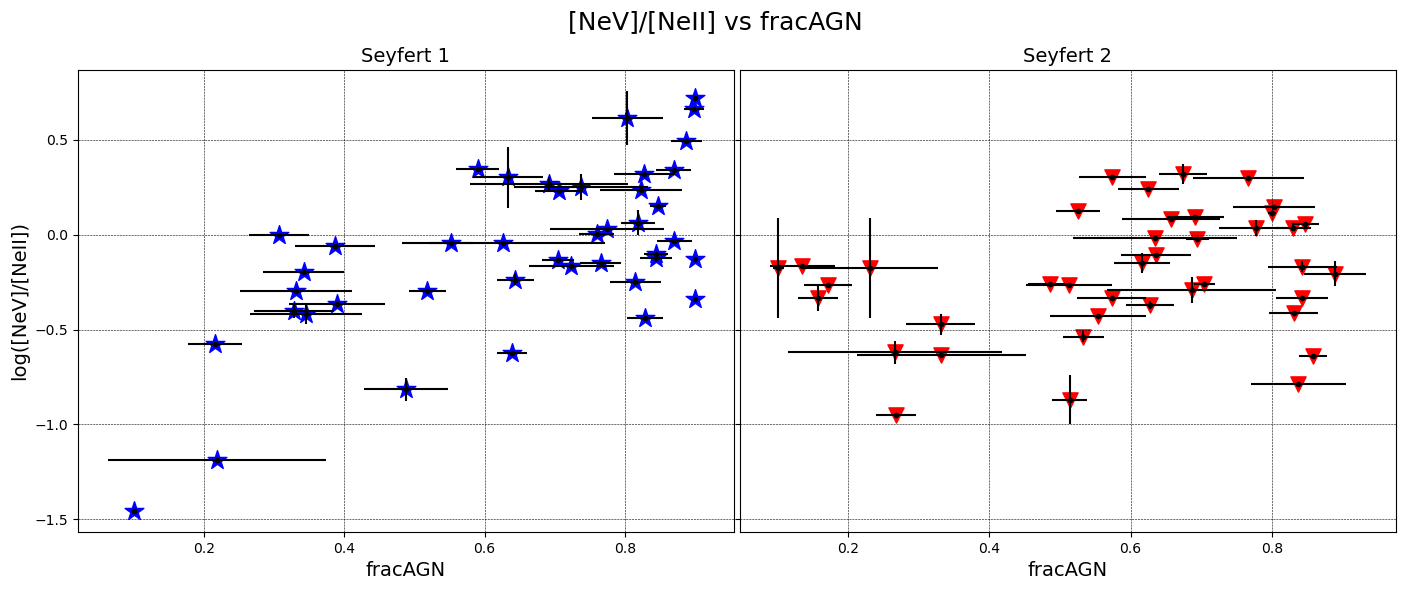

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'[NeV]/[NeII] vs fracAGN', fontsize=18)
ax1.scatter(Ne_Sy1['bayes.agn.fracAGN'],Ne_Sy1['log_[NeV]/[NeII]'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['bayes.agn.fracAGN'], Ne_Sy1['log_[NeV]/[NeII]'],\
             Ne_Sy1['log_[NeV]/[NeII]_err'], Ne_Sy1['bayes.agn.fracAGN_err'], fmt='k.')
ax1.set_xlabel(r'fracAGN', fontsize=14)
ax1.set_ylabel(r'log([NeV]/[NeII])', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['log_[NeV]/[NeII]'], 120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['log_[NeV]/[NeII]'], \
             Ne_Sy2['log_[NeV]/[NeII]_err'], Ne_Sy2['bayes.agn.fracAGN_err'], fmt='k.')
ax2.set_xlabel(r'fracAGN', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

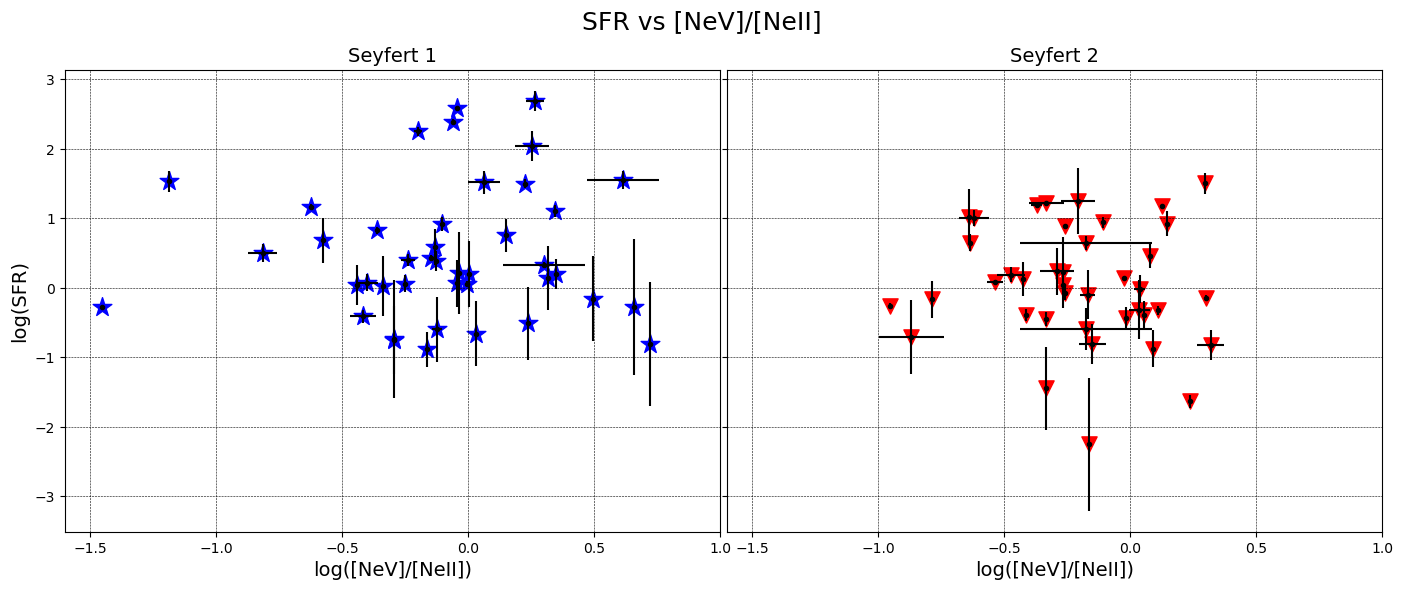

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'SFR vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['log_[NeV]/[NeII]'],Ne_Sy1['log_bayes.sfh.sfr'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['log_[NeV]/[NeII]'], Ne_Sy1['log_bayes.sfh.sfr'],\
             Ne_Sy1['log_bayes.sfh.sfr_err'], Ne_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.6,1)
ax1.set_xlabel(r'log([NeV]/[NeII])', fontsize=14)
ax1.set_ylabel(r'log(SFR)', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['log_bayes.sfh.sfr'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['log_bayes.sfh.sfr'],\
             Ne_Sy2['log_bayes.sfh.sfr_err'], Ne_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.6,1)
ax2.set_xlabel(r'log([NeV]/[NeII])', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')

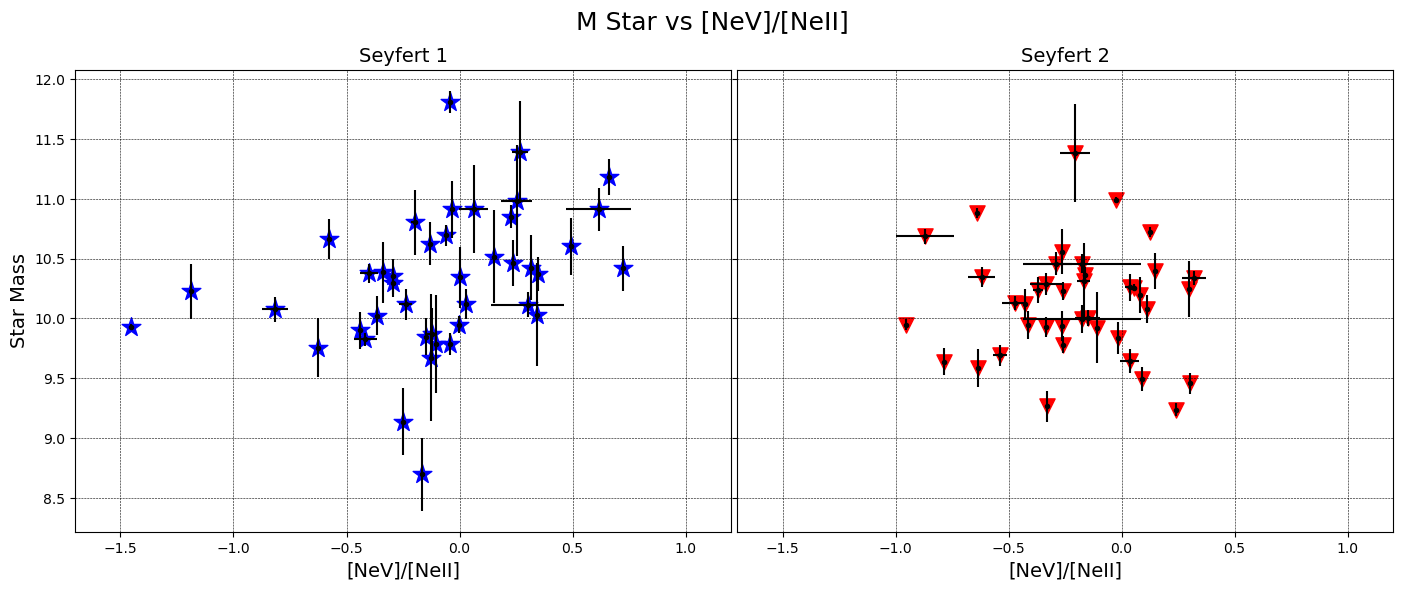

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'M Star vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['log_[NeV]/[NeII]'],Ne_Sy1['log_bayes.stellar.m_star'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['log_[NeV]/[NeII]'], Ne_Sy1['log_bayes.stellar.m_star'],\
             Ne_Sy1['log_bayes.stellar.m_star_err'], Ne_Sy1['log_[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(-1.7,1.2)
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_ylabel(r'Star Mass', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['log_bayes.stellar.m_star'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['log_[NeV]/[NeII]'], Ne_Sy2['log_bayes.stellar.m_star'],\
             Ne_Sy2['log_bayes.stellar.m_star_err'], Ne_Sy2['log_[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(-1.7,1.2)
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

In [30]:
AGN_T1 = Ne_Sy[Ne_Sy['bayes.agn.i']<45]
AGN_T2 = Ne_Sy[Ne_Sy['bayes.agn.i']>45]

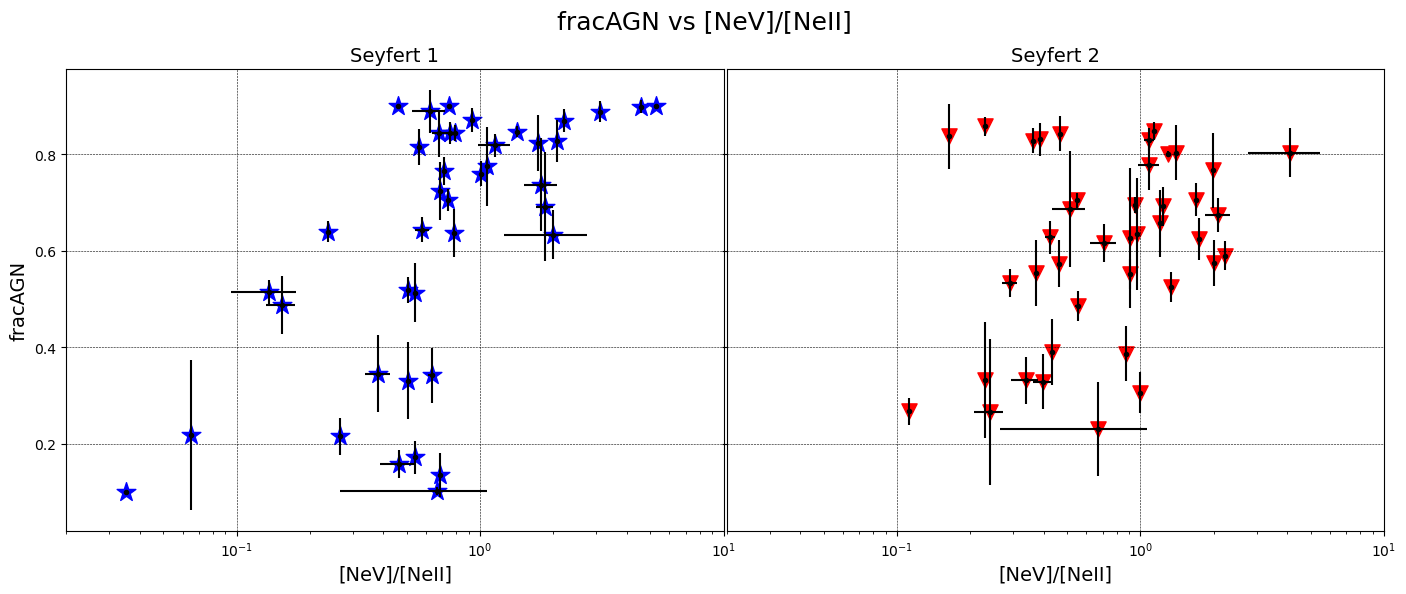

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(AGN_T1['[NeV]/[NeII]'],AGN_T1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(AGN_T1['[NeV]/[NeII]'], AGN_T1['bayes.agn.fracAGN'],\
             AGN_T1['bayes.agn.fracAGN_err'], AGN_T1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(AGN_T2['[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(AGN_T2['[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],\
             AGN_T2['bayes.agn.fracAGN_err'], AGN_T2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [32]:
df_AGN_T1 = AGN_T1.to_pandas()
df_AGN_T2 = AGN_T2.to_pandas()

NeVNeII_corr_AGNT1 = df_AGN_T1.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_AGNT1

RA                              -0.061583
DEC                              0.150371
redshift                         0.356324
[NeV]/[NeII]                     0.805889
[NeV]/[NeII]_err                 0.583314
[NeV]/[NeIII]                    0.607830
[NeV]/[NeIII]_err                0.145879
[NeIII]/[NeII]                   0.795820
[NeIII]/[NeII]_err               0.641247
[NeII]/[NeV]                    -0.783276
[NeII]/[NeV]_err                -0.724569
bayes.agn.fracAGN                0.619915
bayes.agn.fracAGN_err           -0.153562
bayes.agn.i                      0.035476
bayes.agn.i_err                 -0.385695
bayes.agn.disk_luminosity        0.231073
bayes.agn.disk_luminosity_err    0.178824
bayes.sfh.sfr                    0.147250
bayes.sfh.sfr_err                0.172772
bayes.stellar.m_star             0.270123
bayes.stellar.m_star_err         0.235371
best.reduced_chi_square         -0.210826
log.reduced_chi_square          -0.198678
log_[NeV]/[NeII]                 1

In [33]:
NeVNeII_corr_AGNT2 = df_AGN_T2.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_AGNT2

RA                               0.151845
DEC                             -0.203467
redshift                         0.274329
[NeV]/[NeII]                     0.891756
[NeV]/[NeII]_err                 0.756935
[NeV]/[NeIII]                    0.548433
[NeV]/[NeIII]_err                0.076842
[NeIII]/[NeII]                   0.706150
[NeIII]/[NeII]_err               0.733076
[NeII]/[NeV]                    -0.894445
[NeII]/[NeV]_err                -0.421254
bayes.agn.fracAGN                0.323089
bayes.agn.fracAGN_err           -0.154086
bayes.agn.i                     -0.039888
bayes.agn.i_err                 -0.248339
bayes.agn.disk_luminosity        0.140783
bayes.agn.disk_luminosity_err    0.071254
bayes.sfh.sfr                    0.106345
bayes.sfh.sfr_err                0.167590
bayes.stellar.m_star             0.106441
bayes.stellar.m_star_err         0.162659
best.reduced_chi_square          0.024286
log.reduced_chi_square           0.066298
log_[NeV]/[NeII]                 1

In [34]:
AGN_T1

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,[NeII]/[NeV],[NeII]/[NeV]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,bayes.agn.disk_luminosity,bayes.agn.disk_luminosity_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,log.reduced_chi_square,log_[NeV]/[NeII],log_[NeV]/[NeII]_err,log_[NeV]/[NeIII],log_[NeV]/[NeIII]_err,log_[NeIII]/[NeII],log_[NeIII]/[NeII]_err,log_bayes.sfh.sfr,log_bayes.sfh.sfr_err,log_bayes.stellar.m_star,log_bayes.stellar.m_star_err
str24,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2E 2389,166.0577547903,76.98283181919,Sy1,0.3115,1.1556064073226544,0.17151303566833198,nan,nan,nan,nan,0.8653465346534653,0.12843318462325534,0.8188987719707819,0.024258975221072464,26.011843998959925,11.071888539354369,1.8591392566232316e+39,1.255581728634208e+38,32.99957287515418,13.005716016371974,82007440862.93582,69392222513.68936,1.442908260688541,0.15923871976759285,0.06280994114823953,0.06445721007882468,nan,nan,nan,nan,1.5185083186910966,0.17116314567100893,10.913853259445968,0.3674868890868961
2E 3648,245.09091058141,17.60665343366,Sy1,0.55517,1.7878787878787878,0.279439361062646,0.7391975308641976,nan,2.4545454545454546,0.2468333394786096,0.559322033898305,0.08742012760621128,0.7373844941753334,0.09571439256469585,32.20528489575952,9.404682549643882,2.0566345877118184e+39,1.3435115805324631e+38,110.83038756721615,54.366157677823296,96631370793.32745,102566202983.27977,2.3766658631781086,0.37596812830862414,0.25233807176425666,0.06787874735068745,-0.1312394924560301,nan,0.3899710790007623,0.043673404819942016,2.0446588519392694,0.21303653988795507,10.985118140397837,0.4609676507712656
2MASSI J0918486+211717,139.7025485953,21.288075035289996,Sy1,0.14903,4.562118126272912,nan,1.7230769230769232,nan,2.6476578411405294,nan,0.21919642857142857,nan,0.8988839720632542,0.013870021401598235,44.20391814907898,14.529180682596715,1.8396031516838928e+37,4.904386892756304e+36,0.5329401797567834,1.1935901737550823,152823017793.68384,53131442843.11487,0.9454285200616502,-0.024371300786463282,0.6591665262111943,nan,0.23630466602732605,nan,0.4228618601838683,nan,-0.27332153592564123,0.9726600579305971,11.18418877143811,0.15098964001270024
2MASX J14510879+2709272,222.78651997439997,27.15748964087,Sy1,0.06449,5.266272189349112,nan,nan,nan,nan,nan,0.1898876404494382,nan,0.899955362964844,0.0014940994387965115,7.5626569304964075,7.822212659918313,3.366525798361697e+37,1.6832628991808487e+36,0.15462531197470453,0.31682075857974806,26200318190.297752,11239826484.458948,1.2185272266241656,0.08583523745224399,0.7215033020312392,nan,nan,nan,nan,nan,-0.8107194111218787,0.8898511210512292,10.418306565649951,0.1863105090669539
7C 1821+6419,275.4883876131,64.34339480891,Sy1,0.297,1.8472727272727272,0.15141003725431723,0.48846153846153845,0.02311472217491531,3.7818181818181817,0.31056886962893887,0.5413385826771654,0.04437032700166525,0.6915592854364581,0.11269035291407396,33.40082195370531,10.102853041982137,5.813284326139949e+39,1.527517162771796e+39,489.74909023323397,166.51602998912847,245212945616.7012,240727355723.95312,2.0802254795831856,0.3181104115163454,0.26653101845365657,0.0355965541598166,-0.3111696270148611,0.0205514569742995,0.5777006454685176,0.03566494734708087,2.6899736379142407,0.14766131150601067,11.389543394319004,0.4263500932674798
ESO 12-21,10.19198817425,-79.24003722924,Sy1,0.033396756044708376,0.2658333333333333,nan,0.4968847352024922,nan,0.535,nan,3.761755485893417,nan,0.21508369490617207,0.03860409079268917,28.656096724735818,16.950601102446953,2.0900701110798714e+37,1.3278704475332147e+37,4.828426087670747,3.564445634025986,46391431187.28613,1

In [35]:
AGN_T2

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,[NeII]/[NeV],[NeII]/[NeV]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,bayes.agn.disk_luminosity,bayes.agn.disk_luminosity_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,log.reduced_chi_square,log_[NeV]/[NeII],log_[NeV]/[NeII]_err,log_[NeV]/[NeIII],log_[NeV]/[NeIII]_err,log_[NeIII]/[NeII],log_[NeIII]/[NeII]_err,log_bayes.sfh.sfr,log_bayes.sfh.sfr_err,log_bayes.stellar.m_star,log_bayes.stellar.m_star_err
str24,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2C 94,17.220292429510003,13.33729522217,Sy2,0.059615,0.5128205128205128,0.0812943431354469,0.37735849056603776,0.05836748377170459,1.358974358974359,0.08652562196640158,1.95,0.3091217397725368,0.6865611565783494,0.11967341436995055,73.83482561588654,8.508248513418419,1.3787638404047036e+35,5.1210194135958615e+34,1.7246193065665494,1.3163365088890544,28682725610.48474,6450427912.662605,1.3173407609701728,0.11969812990994547,-0.29003461136251807,0.06884608503566447,-0.4232458739368078,0.06717399173026657,0.13321126257428986,0.027651441629564996,0.2366932435809116,0.331480507009068,10.457620418311992,0.0976680280119563
2C 1883,349.14663898619995,4.08841586141,Sy2,0.22,nan,nan,nan,nan,0.3215434083601286,0.03199976335108683,nan,nan,0.1676884426585983,0.07816057785123717,57.27044594574329,27.99390132811201,4.122521094010961e+36,5.782731031797155e+36,103.9120034706322,24.030265174755055,85948162689.7023,57012631337.310844,1.8403458401068076,0.26489944384462905,nan,nan,nan,nan,-0.4927603890268375,0.04322066720777531,2.0166657182978276,0.10043316667469993,10.934236597227232,0.28808377530966245
2MASS J13000535+1632148,195.02228295163,16.53743305218,Sy1,0.07993,nan,nan,nan,nan,0.8682634730538922,nan,nan,nan,0.8997482762713642,0.0035397704007171173,60.00022899305476,0.047852752121327925,1.860024667933385e+36,9.300123339666926e+34,0.5592751145937703,0.3523226196938686,90494096430.65376,16511046241.395515,2.9185132854550697,0.4651616746160927,nan,nan,nan,nan,-0.0613484689126084,nan,-0.25237450453202054,0.2735894474651983,10.956620248031513,0.07923893995209312
2MASX J00215355-7910077,5.47314754327,-79.16889600056,Sy2,0.072724,1.987075928917609,nan,0.8785714285714286,nan,2.261712439418417,nan,0.5032520325203252,nan,0.7668399788349383,0.078318343385068,68.82995098998134,5.472195587614543,2.230156853448609e+36,3.5161324093452546e+35,32.044520006954116,11.024790692810797,17698689521.858826,9477467586.7114,1.175129187601683,0.0700856133128245,0.2982144624192799,nan,-0.0562229242388401,nan,0.3544373866581201,nan,1.5057537706964184,0.1494173032077557,10.247941110740607,0.2325602621732075
2MASX J22041914+0333511,331.07985144241997,3.56423713312,Sy2,0.0611,1.4,nan,0.5907801418439717,nan,2.369747899159664,nan,0.7142857142857143,nan,0.8034772342919497,0.05764760918306174,63.27370956183844,5.131987731592176,1.6393283787180736e+36,2.5574152409960315e+35,8.406223998670196,3.510156460305732,25023754285.502865,8748674592.276484,1.3187962121295964,0.12017769108441771,0.146128035678238,nan,-0.2285741112485923,nan,0.37470214692683035,nan,0.924600958366336,0.18134677134097138,10.398352466954636,0.15183577396274395
3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,4.125,1.3524428130239001,0.5468077474892397,0.06828504167318082,10.25,2.7077723778043086,0.24242424242424243,0.07948240590774068,0.8034799514202404,0.05075017016454414,63.91729158454189,4.881367022531865,1.1161116813933017e+37,1.1278736022016923e+36,35.95897699663074,10.767347614953854,81806980038.3679,33820452612.22372,2.5104372093516596,0.39974936334306105,0.6154239528859439,0.14238992746327056,-0.26216534072457226,0.05423